In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Sinc interpolation

In [2]:
# Periodo (simula 1 periodo de tiempo continuo)
n_samples = 10000
t = np.linspace(0, 1, n_samples+1)

# Crea 4 señales base
x1 = np.sin(2 * np.pi * t)
x2 = 0.5 * np.cos(2 * np.pi * 4 * t)
x3 = np.sin(2 * np.pi * 8 * t)
x4 = 0.25 * np.cos(2 * np.pi * 32 * t)

# Señal compuesta
x = x1 + x2 + x3 + x4 

# Remember: sin and cos function get their parameters as radians.

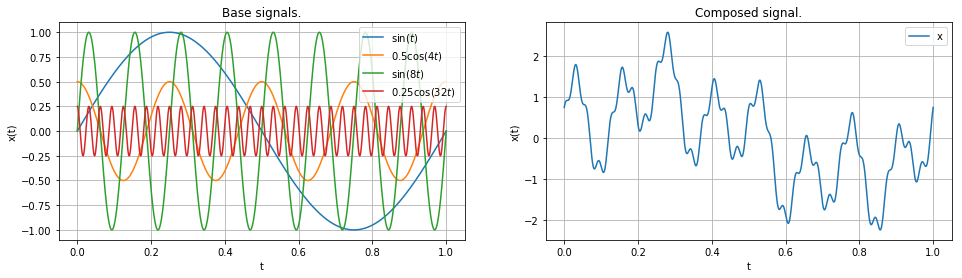

In [3]:
                                                                    # Plot them
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(t, x1, label='$\sin(t)$')
plt.plot(t, x2, label='$0.5 \cos(4t)$')
plt.plot(t, x3, label='$\sin(8t)$')
plt.plot(t, x4, label='$0.25 \cos(32t)$')
plt.legend()
plt.title('Base signals.')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(t, x, label='x')
plt.legend()
plt.title('Composed signal.')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

In [4]:
# == Q1 ==
# ¿Cual es la frecuencia f0 (en Hertz) de la señal compuesta x?
# ¿Cual es su frecuencia w0 (en radianes)?

In [5]:
# == Q2 ==
# ¿Cual es la frecuencia máxima $\Omega$ (en radianes) del espectro de la señal compuesta x?
# ¿Qué frecuencia de muestreo Fs asegura su reconstrucción usando interpolación sinc?

n: [    0  1250  2500  3750  5000  6250  7500  8750 10000]


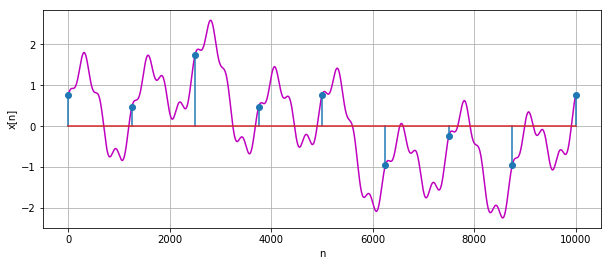

In [6]:
# Define el número de muestras por periodo y crea los índices de tiempo
N = 8
n = np.linspace(0, len(x)-1, N+1).astype('int')
#n = (n_samples * np.linspace(t.min(), t.max(), N+1) / t.max()).astype(int) # Otra de varias maneras de hacerlo
print(f"n: {n}")

# Plot it
plt.figure(figsize=(10, 4))
plt.plot(n_samples * t / t.max(), x, c='m')
plt.stem(n, x[n])
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid()
plt.show()

# == Q3 ==
# ¿Por qué para hacer esta gráfica multiplicamos t por n_samples/t.max()?
# ¿Por qué no hacemos igual con n?

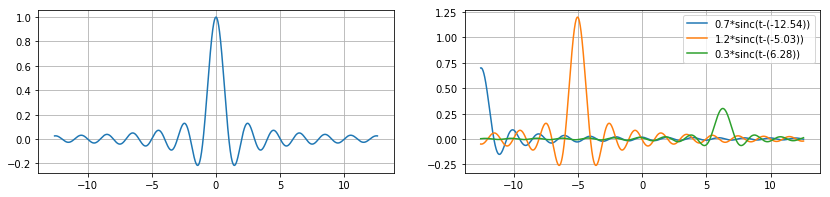

In [7]:
# Muestra la funcion sinc
t_ = np.linspace(-4*np.pi, 4*np.pi, n_samples+1) # Dummy time from -2pi to 2pi
sinc = np.sinc(t_)

# Plot it
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.plot(t_, sinc)
plt.grid()

# sinc desfasada y escalada
plt.subplot(1, 2, 2)
for shift, scale in zip([10, 3000, 7500], [0.7, 1.2, 0.3]): # Indices de desfase y coeficientes de escalamiento
  sinc = scale * np.sinc(t_ - t_[shift]) # Desfasa el tiempo y crea sinc
  plt.plot(t_, sinc, label=f'{scale}*sinc(t-({t_[shift]:4.2f}))')
plt.legend()
plt.grid()
plt.show()

In [8]:
# Sinc interpolation
def sinc_interp(x, N, verbose=True):
  '''Recibe la señal en tiempo continuo durantre un periodo y el número de muestras'''

  # Muestreo
  n = np.linspace(0, len(x)-1, N+1).astype('int')
  #print(n)
  #print(x[n])

  # Plot muestreo
  if verbose:
    plt.figure(figsize=(22, 4))
    ax = plt.subplot(1, 3, 1)
    ax.plot(t, x, c='m')
    ax.stem(t[n], x[n])
    ax.set_title(f'{N} muestras por periodo.')
    ax.set_xlabel('$t$')
    ax.set_ylabel('$x(t)$')

  # Sinc's
  x_hat = np.zeros_like(x)
  if verbose:
    ax = plt.subplot(1, 3, 2)
    ax.stem(t[n], x[n])

  for shift, scale in zip(n[:-1], x[n][:-1]):
    #print(shift, scale)
    sinc = scale * np.sinc((t - t[shift]) * N)
    x_hat += sinc # acumulacion
    if verbose:
      ax.plot(t, sinc, color='b')

  if verbose:
    ax.set_title("Set of sinc's")
    ax.set_xlabel('$t$')
    ax.set_ylabel('$x(t)$')
  loss = np.linalg.norm(x - x_hat, ord=2) #-E-

  # Reconstruction
  if verbose:
    ax = plt.subplot(1, 3, 3)
    ax.plot(t, x, linewidth=2, c='m', label='$x(t)$')
    ax.plot(t, x_hat, linestyle='--', label='$\hat{x}(t)$')
    ax.set_title(f'Reconstruction (MSE={loss:.2f})')
    ax.set_xlabel('$t$')
    ax.set_ylabel('$x(t)$')
    ax.legend()
    plt.grid()
    plt.show()

  # Calcula el error y devuelvelo
  return(loss)

In [9]:
# == Q4 ==
# De la función anterior,
# ¿Por qué los argumentos del 'for' están indizados hasta [:-1]?

# == Q5 ==
# De la función anterior,
# ¿Qué estamos calculando en la línea indicada con "-E-"

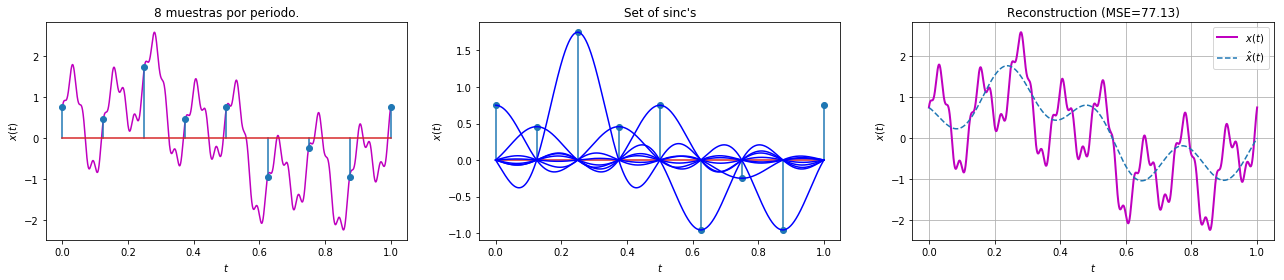

Loss: 77.13035784660383


In [10]:
# Test de la función anterior
loss = sinc_interp(x, 8)
print(f"Loss: {loss}")

In [27]:
# == Q6 ==
# Explora varios valores para N (número de muestras) y reporta aquel que obtenga
# el menor error. --Quizás quieras apagar el argumento 'verbose'--.
Loss = []
N_samp = []
for N in range(0, 300, 10):
  N_samp.append(N)
  Loss.append(sinc_interp(x, N, verbose=False))

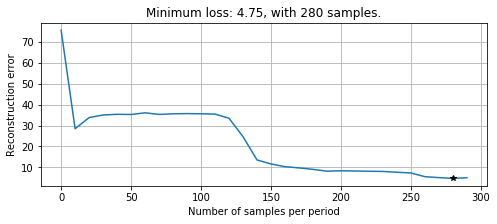

In [28]:
# Encuentra la pérdida mínima
Loss = np.array(Loss)
idx_min = Loss.argmin()

# Plot historic loss
plt.figure(figsize=(8, 3))
plt.plot(N_samp, Loss)
plt.plot(N_samp[idx_min], Loss[idx_min], '*', c='k')
plt.title(f"Minimum loss: {Loss[idx_min]:.2f}, with {N_samp[idx_min]} samples.")
plt.xlabel('Number of samples per period')
plt.ylabel('Reconstruction error')
plt.grid()
plt.show()

In [26]:
# == Q7 ==
# ¿Qué conclusión obtienes sobre la relación entre el error mínimo obtenido
# y su correspondiente número de muestras?

# == Q8 ==
# ¿Qué razones crees que haya para que el error no llegue exactamente a cero?

# == Q9 ==
# ¿Podemos interpretar la interpolación sinc como una convolución?
# Explica por qué sí o por qué no.

# Parte 2: Promedio móvil - denoising

In [14]:
# Crea una señal
n_samples = 10000
t = np.linspace(0, 1, n_samples+1)

# Crea 3 señales base
x1 = np.sin(2 * np.pi * t)
x2 = 0.125 * np.cos(2 * np.pi * 128 * t)
x2[:4000] = 0
x2[6000:] = 0
x3 = 1.125 * np.cos(2 * np.pi * 64 * t)
x3[:8000] = 0
x3[9000:] = 0

# Señal compuesta
x = x1 + x2 + x3

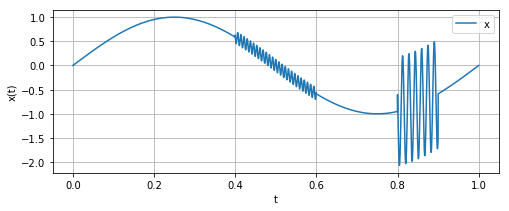

In [15]:
# Plot it
plt.figure(figsize=(8, 3))
plt.plot(t, x, label='x')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

In [44]:
# Promedio móvil para remover ruido
init = 200
step = 300

# Inicializa los primeras n muestras iguales a la entrada
y = np.zeros_like(x)
y[:init] = x[:init].copy()

# Calcula promedio móvil
for n in range(init, len(x)):
  y[n] = x[n-step+1:n+1].mean()

/home/vfloresp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice.
  # This is added back by InteractiveShellApp.init_path()


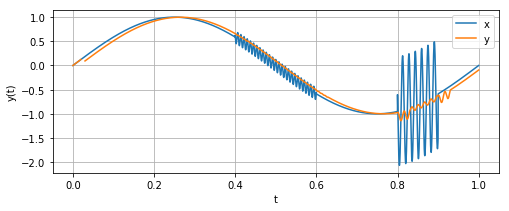

In [45]:
# Plot it
plt.figure(figsize=(8, 3))
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

In [18]:
# == Q10 ==
# En el código de las dos celdas anterior, encuentra los valores para los parámetros 'init' y 'step'
# que mejor remuevan las frecuencias altas. Reporta las combinaciones evaluadas y su respectivo
# error.

# == Q11 ==
# ¿Qué pasa si el parámetro step es mayor que init? ¿Por qué?

# Parte 3: Recursión - Ajuste exponencial

In [19]:
# Promedio móvil mediante recursión (ajuste exponencial)
y = np.zeros_like(x)
alfa = 0.15
for n in range(1, len(x)):
  y[n] = alfa * x[n] + (1-alfa) * y[n-1]

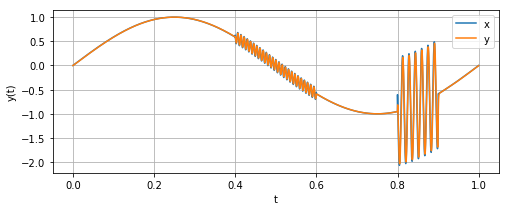

In [20]:
# Plot it
plt.figure(figsize=(8, 3))
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

In [21]:
# == Q10 ==
# En el código de las dos celdas anterior, encuentra el valor para el parámetro 'alfa'
# que mejor remueva las frecuencias altas. Reporta los valores evaluadas y su respectivo
# error.

# == Q11 ==
# ¿Cuál implementación es más rápida, promedio móvil o ajuste exponencial? ¿Por qué?
# ¿Cuál requiere menos memoria?

In [22]:
# Promedio móvil mediante recursión (ajuste exponencial)
y = np.zeros_like(x)
alfa = 0.86
a0 = (1 + alfa) / 2.
a1 = -(1 + alfa) / 2.
b1 = alfa
for n in range(1, len(x)):
  y[n] = # tu código aquí

# == Q11 == 
# Deacuerdo a la notación estándard para recursión sugerida en clase (a0,...,aK, b1,...,bK)
# usa los coeficientes a0, a1, b1 dados, para crear una ecuación de recursión.

# == Q12 ==
# ¿Qué función realiza esta ecuación de recursión?

SyntaxError: invalid syntax (<ipython-input-22-cea9483a29a8>, line 8)

In [ ]:
# Plot it
plt.figure(figsize=(8, 3))
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()